## DOQ images preparation, cropping to tiles and uploading to Hub


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from datasets import Dataset
from itertools import product
import os
# from torch.utils.data import Dataset
import gc

In [3]:
# Directory paths:
dir_tif = "data/doq_data/"
dir_DOQ_large = '/data/earth_explorer_images/new_tiffs/'
# Output directories:
dir_DOQ_tiles_512 = "/data/earth_explorer_images/doq_tiles_large_512/"
dir_DOQ_tiles_64 = "/data/earth_explorer_images/doq_tiles_large_64"

In [4]:
gc.collect()
Image.MAX_IMAGE_PIXELS = None

In [5]:
# tif files:
file1 = "C3311604.SES.100201791.tif"
file2 = "C4712134.NES.100228298.tif"
file3 = "O3712206.SWS.53377.tif"
file4 = "O3712208.SWS.53164.tif"
file5 = "O3712223.SES.53274.tif"
file6 = "O3712232.NWS.53174.tif"
file7 = "O3910434.NES.1137827.tif"

file8 = 'C2909230.NWS.100236165.tif'
file9 = 'C3009149.SWS.100213457.tif'
file10 = 'C3009216.SES.100213196.tif'
file11 = 'C3311815.SWS.100213016.tif'
file12 = 'C3311816.SES.100213019.tif'
file13 = 'O4208850.SWS.100237229.tif'
file14 = 'C3411849.NWS.100212623.tif'

file15 = 'O3411229.NES.100230408.tif'
file16 = 'O3411232.SES.100230186.tif'
file17 = 'O3411232.SWS.100230187.tif'
file18 = 'O3411256.NWS.100224706.tif'
file19 = 'O4008701.NES.100238712.tif'
file20 = 'O4008848.NWS.100239008.tif'
file21 = 'O4208850.SWS.100237229.tif'


In [6]:
# Splitting Tif images to tiles and saving as png:
def split_images_to_tiles(filename, dir_in, dir_out, d):
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    w, h = img.size
    ext = '.png'
    grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
    for i, j in grid:
        box = (j, i, j+d, i+d)
        out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
        img.crop(box).convert('L').save(out)
        
    return None

# the code was adapted from:
# https://stackoverflow.com/questions/5953373/how-to-split-image-into-multiple-pieces-in-pythonS

In [7]:
# Initially I tried to automate all the script for all images, but I was running into discspace/memory issues. 
# Since it was only 20 DOQ image files, it was easier to run it one by one in the end. 

# for file in os.listdir(dir_DOQ_large):
#     split_images_to_tiles(file, dir_DOQ_large, dir_DOQ_tiles_64, 64)
    

In [27]:
# Slitting images to 512 by 512 tiles
# split_images_to_tiles(file4, dir_DOQ_large, dir_DOQ_tiles_512, 512) 

In [56]:
# Slitting images to 64 by 64 tiles
# split_images_to_tiles(file2, dir_DOQ_large, dir_DOQ_tiles_64, 64)


In [10]:
# QC: color test and dimensions test:
f = 'C3311604.SES.100201791_0_5632.png'
img = Image.open(os.path.join(dir_DOQ_tiles_512 + f))
print(img.size)
print(len(np.shape(img)))

(512, 512)
2


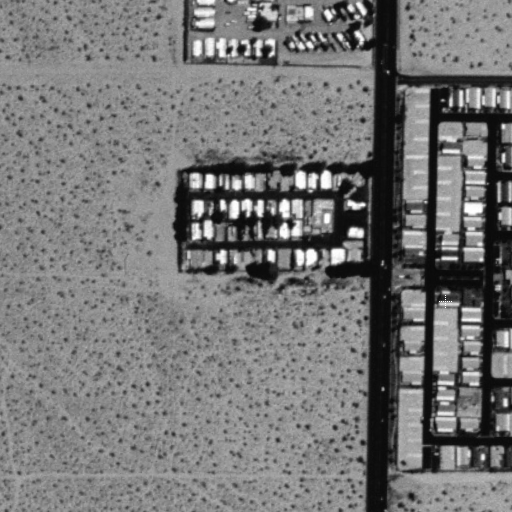

In [11]:
# visualizing a sample image to make sure it looks correct:
img 

In [13]:
f = 'O3712206.SWS.53377_6144_5632.png'
img = Image.open(os.path.join(dir_DOQ_tiles_512 + f))
print(img.size)
print(len(np.shape(img)))

(512, 512)
2


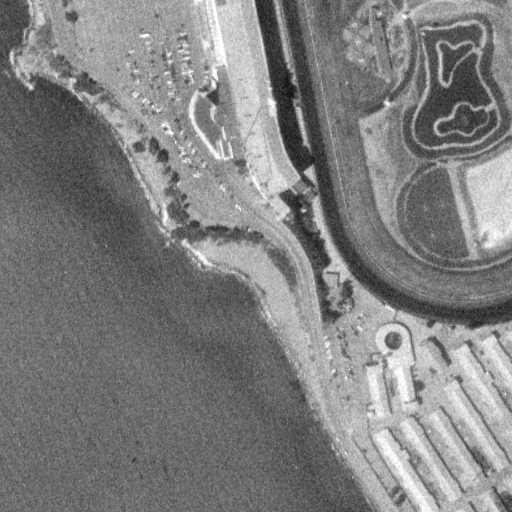

In [14]:
# visualizing a sample image to make sure it looks correct:
img

## Uploading the dataset to Huggingface Hub:

In [2]:
# https://huggingface.co/docs/datasets/upload_dataset

from datasets import load_dataset
from huggingface_hub import notebook_login

notebook_login()

In [59]:
dataset = load_dataset("/data/earth_explorer_images/doq_tiles_large_64")

Resolving data files:   0%|          | 0/320194 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [61]:
dataset.push_to_hub("ReginaFoley/doq_data_large_64")

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/160097 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1601 [00:00<?, ?ba/s]

Map:   0%|          | 0/160097 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1601 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ReginaFoley/doq_data_large_64/commit/fce2227a38a7539c7f8bbf2df0cc45ee6c6da620', commit_message='Upload dataset', commit_description='', oid='fce2227a38a7539c7f8bbf2df0cc45ee6c6da620', pr_url=None, pr_revision=None, pr_num=None)

In [12]:
import datasets
import matplotlib.pyplot as plt
import numpy as np

In [13]:
dataset64 = load_dataset("ReginaFoley/doq_data_large_64")

In [17]:
train = dataset64['train']

In [25]:
len(train)

320194

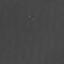

In [21]:
train[0]['image']

In [37]:
image_indices = np.around(np.linspace(0, len(train)-1, num=16))
image_indices

array([     0.,  21346.,  42692.,  64039.,  85385., 106731., 128077.,
       149423., 170770., 192116., 213462., 234808., 256154., 277501.,
       298847., 320193.])

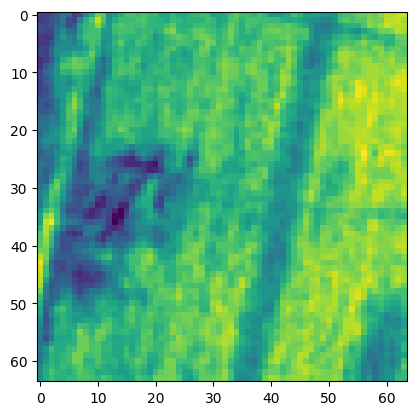

In [38]:
plt.imshow(train[21346]['image'])

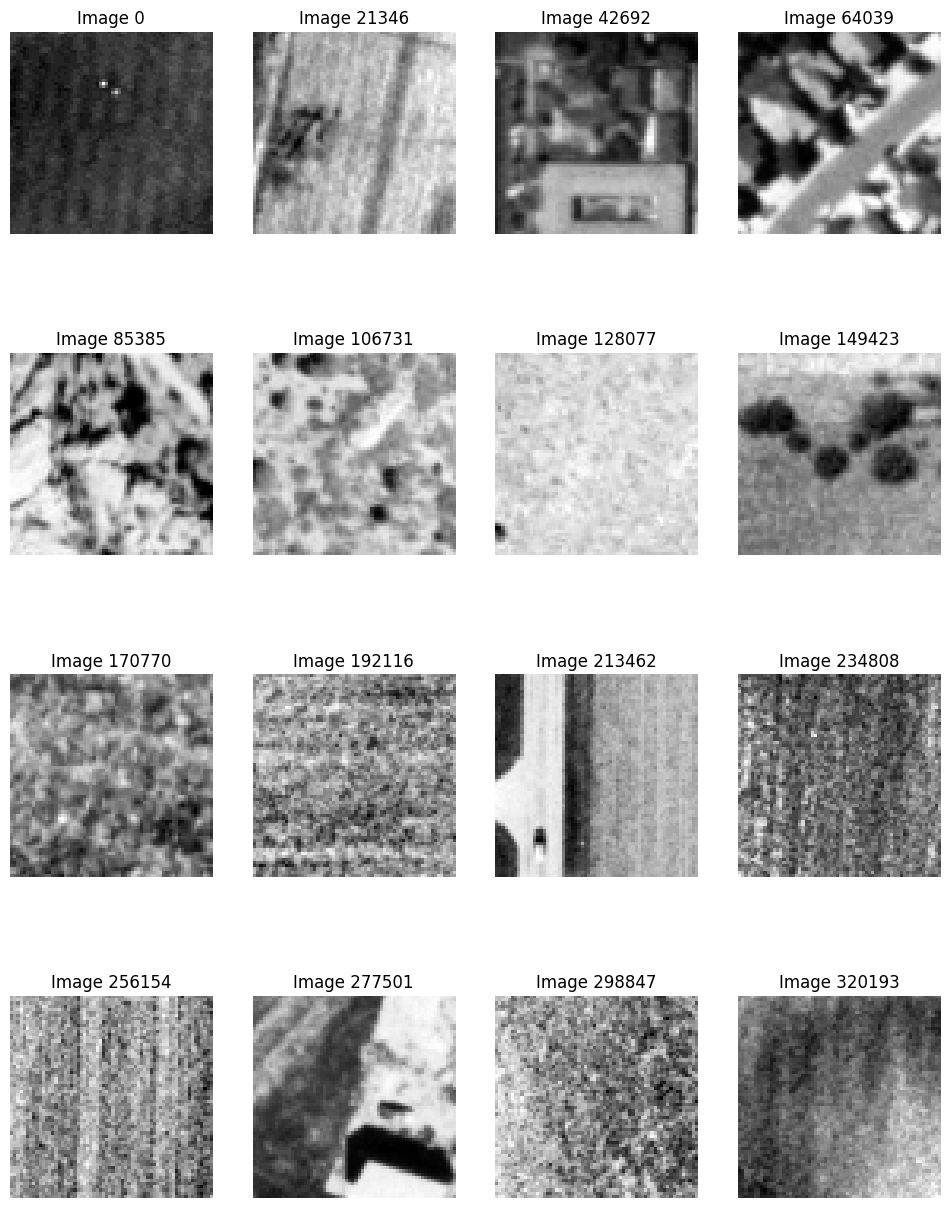

In [41]:
fig, ax = plt.subplots(4, 4, figsize=(12, 16))
for i, axi in zip(image_indices, ax.flat):
    axi.imshow(train[int(i)]['image'], cmap='gray')
    axi.set_title(f'Image {int(i)}')
    axi.axis('off')

# No very obvious artifacts visible anymore in the updated dataset.
# only image 149423 has some barely noticable streaks
# note that some images in the previous numpy array (e.g. 1547) have had quite obvious compression artifacts.
# May want to look at the original images to see if these are present there as well.
